# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

# **Students** (First Name and Last Name)

1.   Oriol Miró
2.   Marc González

---

In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
import scipy

# Convolution
Hint:
*   *convolve function is available in scipy.ndimage module*
*   The mask has to be normalized before convolving with the image

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [ ]:
# solution
camera_image = data.camera()
horizontal_mask = np.ones((1, 15))
horizontal_convolution_image = scipy.ndimage.convolve(camera_image, horizontal_mask)

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [ ]:
# solution
vertical_mask = np.ones((15, 1))
vertical_convolution = scipy.ndimage.convolve(camera_image, vertical_mask)

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

In [ ]:
# solution
both_mask = np.ones((15, 15))
h_and_v_convolved = scipy.ndimage.convolve(camera_image, both_mask)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

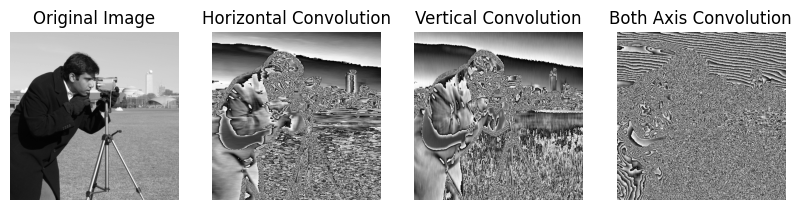

In [ ]:
# solution

fig, ax = plt.subplots(ncols=4, nrows=1, figsize= (10, 6))

ax[0].imshow(camera_image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(horizontal_convolution_image, cmap="gray")
ax[1].set_title("Horizontal Convolution")
ax[1].axis("off")

ax[2].imshow(vertical_convolution, cmap="gray")
ax[2].set_title("Vertical Convolution")
ax[2].axis("off")

ax[3].imshow(h_and_v_convolved, cmap="gray")
ax[3].set_title("Both Axis Convolution")
ax[3].axis("off")

plt.show()

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


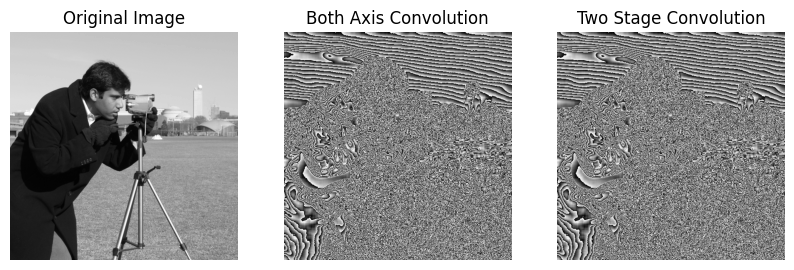

In [ ]:
# solution
two_stage_convolution = scipy.ndimage.convolve(horizontal_convolution_image, vertical_mask)

fig, ax = plt.subplots(ncols=3, nrows=1, figsize= (10, 6))

ax[0].imshow(camera_image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(h_and_v_convolved, cmap="gray")
ax[1].set_title("Both Axis Convolution")
ax[1].axis("off")

ax[2].imshow(two_stage_convolution, cmap="gray")
ax[2].set_title("Two Stage Convolution")
ax[2].axis("off")

plt.show()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

No, it is the same because convolution follows the associative property.

# Image Blurring

*   Why is blurring important?



**Solution**

To filter out noise in images.

### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

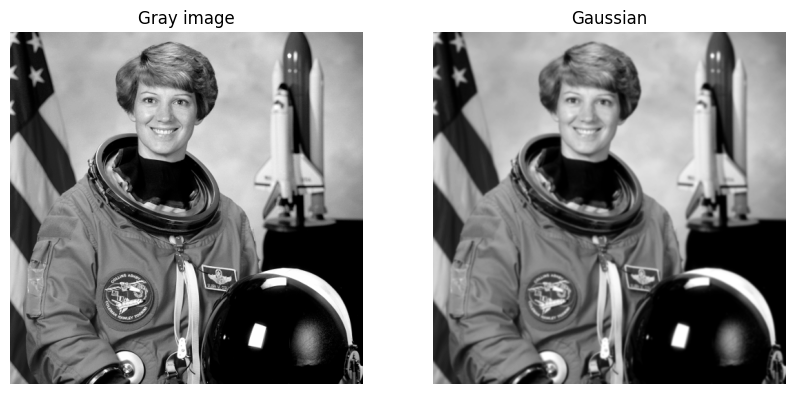

In [ ]:
# solution

astronaut_image = data.astronaut()
astronaut_image = color.rgb2gray(astronaut_image)

astronaut_gaussian = filters.gaussian(astronaut_image, sigma=1)


# visualize

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))

ax[0].imshow(astronaut_image, cmap='gray')
ax[0].set_title('Gray image')
ax[0].axis('off')

ax[1].imshow(astronaut_gaussian, cmap='gray')
ax[1].set_title('Gaussian')
ax[1].axis('off')

plt.show()


*   Apply a gaussian filter with sigma=0. What is the result of this operation?

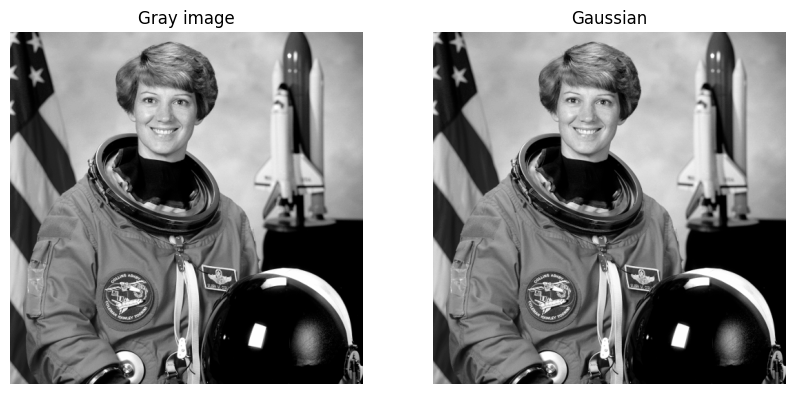

In [ ]:
# solution
astronaut_gaussian = filters.gaussian(astronaut_image, sigma=0)


# visualize

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))

ax[0].imshow(astronaut_image, cmap='gray')
ax[0].set_title('Gray image')
ax[0].axis('off')

ax[1].imshow(astronaut_gaussian, cmap='gray')
ax[1].set_title('Gaussian')
ax[1].axis('off')

plt.show()

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

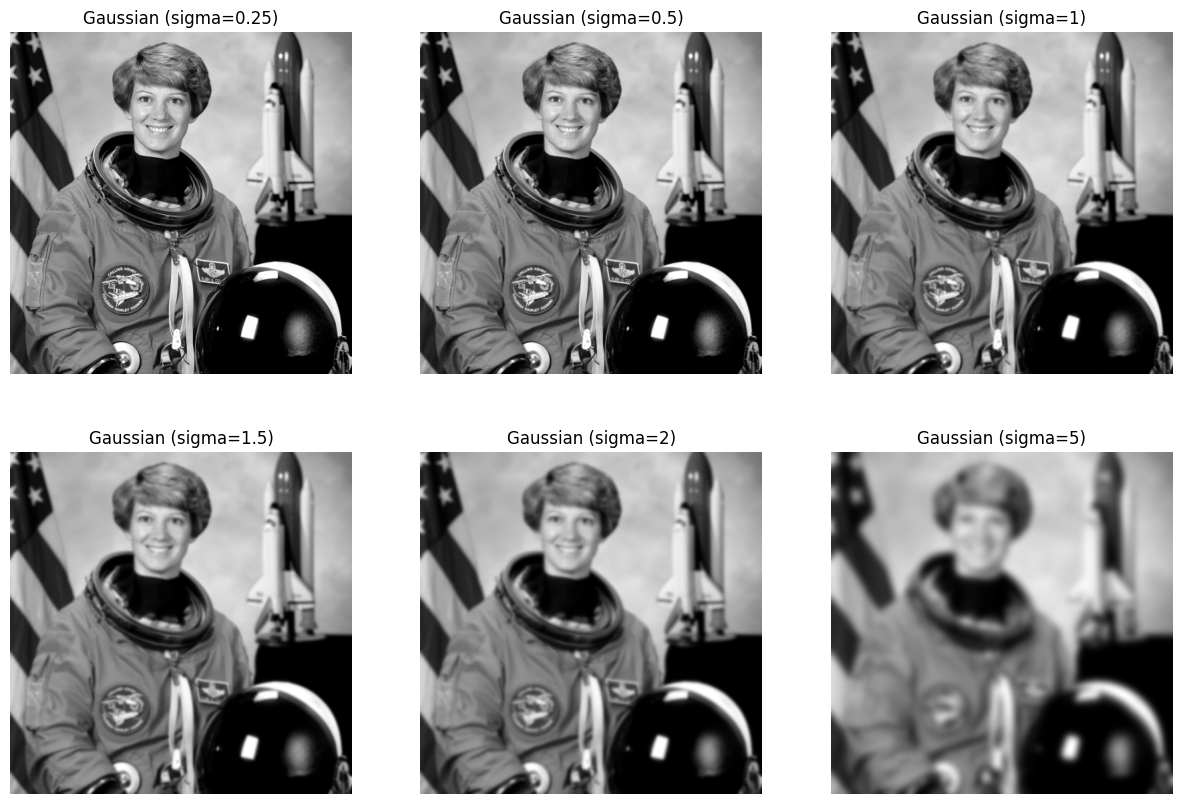

In [ ]:
# solution
sigma_values = [0.25, 0.5, 1, 1.5, 2, 5]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# loop for ease
for i, sigma in enumerate(sigma_values):

    # calc pertaining subplot
    row = i // 3
    col = i % 3

    # gaussian with current filter
    astronaut_gaussian = filters.gaussian(astronaut_image, sigma=sigma)

    # print
    ax[row, col].imshow(astronaut_gaussian, cmap='gray')
    ax[row, col].set_title(f'Gaussian (sigma={sigma})')
    ax[row, col].axis('off')

# show all
plt.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

**Question 1:**
  - Larger sigma: More blurring and more noise is filtered. Can lead to excessive loss of detail, and indistinct edges.
  - Smaller sigma: Less blurring and less noise filtering. Might be insufficient when trying to filter out noise (with sigma=0 the image stays the same, with sigma=0.25 barely any change can be observed)

**Question 2:** Depends on the task's needs; most often, a sigma large enough to filter out noise without losing too much detail.

### Exercise: Median Filter
*   Convert the 'astronaut' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image and the filtered image matplotlib subplot.

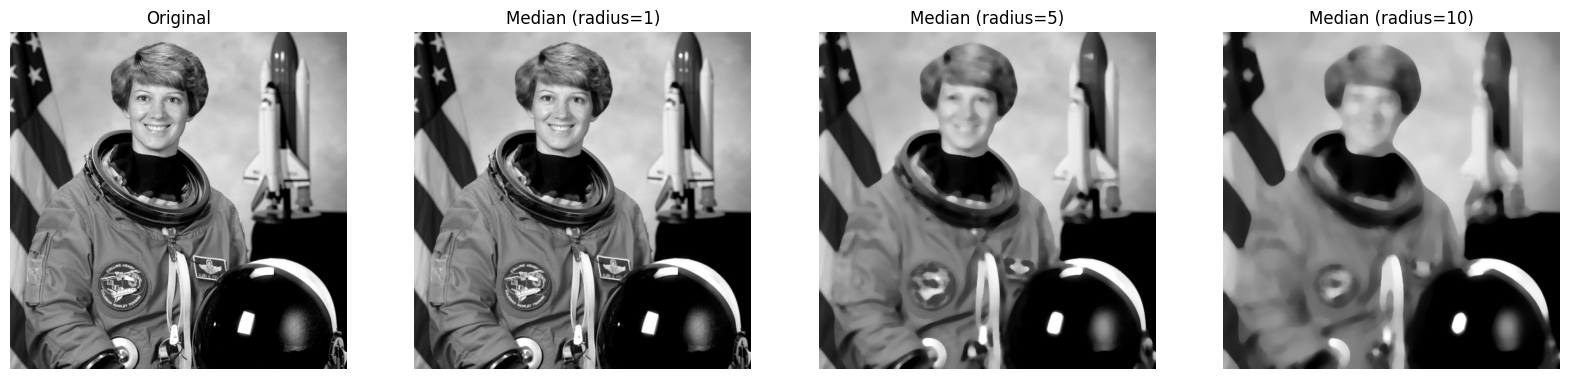

In [ ]:
# solution
astronaut_image = data.astronaut()
astronaut_image = color.rgb2gray(astronaut_image)

radius_list = [1, 5, 10]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# original image
ax[0].imshow(astronaut_image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

for i, radius in enumerate(radius_list):

    # median filter with selected disk
    astronaut_median = filters.median(astronaut_image, morphology.disk(radius))

    # visualise
    ax[i+1].imshow(astronaut_median, cmap='gray')
    ax[i+1].set_title(f'Median (radius={radius})')
    ax[i+1].axis('off')

# show all
plt.show()


*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

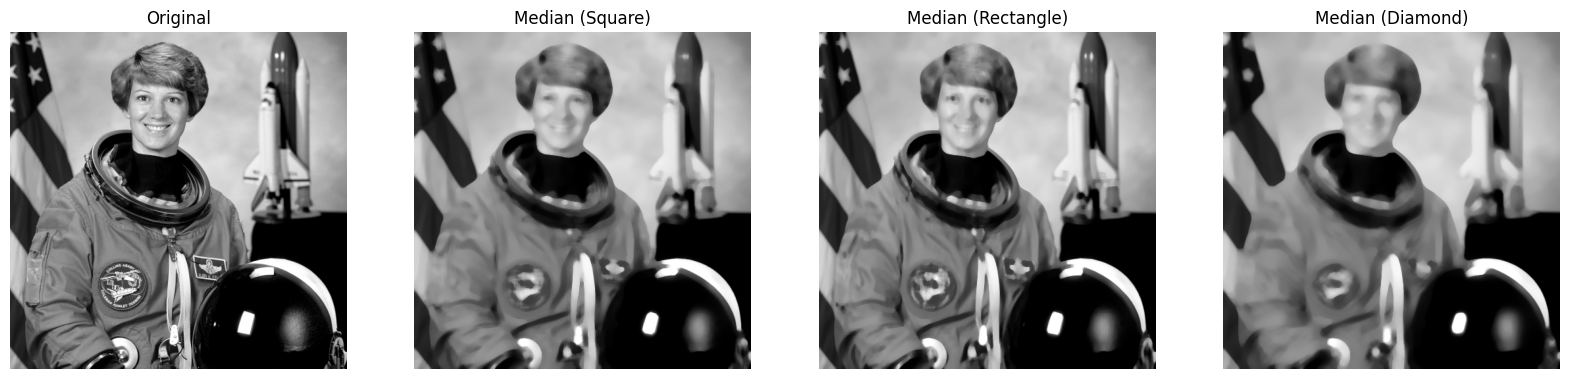

In [ ]:
# solution

radius = 10
structuring_elements = {
    'Square': morphology.square(radius),
    'Rectangle': morphology.rectangle(radius, radius // 2),
    'Diamond': morphology.diamond(radius)
}

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# original image
ax[0].imshow(astronaut_image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

for i, (name, element) in enumerate(structuring_elements.items()):

    # calc
    astronaut_median = filters.median(astronaut_image, element)

    # visualise
    ax[i+1].imshow(astronaut_median, cmap='gray')
    ax[i+1].set_title(f'Median ({name})')
    ax[i+1].axis('off')

# show all
plt.show()

*   What is the effect of the structuring element on the median filter?


**Solution**

It affects how the filter operates on the image. For example, square or rectangle elements preserve more of the geometric features in a blocky manner, while a diamond structuring element smooths the image more naturally along diagonal directions.

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

**Question 1:**
- Gaussian filter: Applies a weighted average where nearby pixels have more influence, leading to a smooth blur. Preserves edges better than a mean filter, but still smoothes them.
- Mean filter: Averages all pixels in the filter window equally, resulting in a simple blur. Effective for reducing uniform noise but can blur edges too much.
- Median filter: Replaces each pixel with the median of neighboring pixel values. Highly effective for some kind of noise, preserves edges.

**Question 2:**
- Gaussian filter: When downsampling an image, to ensure high-frequency spurious information is removed (avoiding problems like aliasing, for example)
- Mean filter: Removing random noise in less detail-sensitive images (simple background-blurring tasks, for example)
- Median filter: Filtering out salt&pepper noise (common in cctv footage, for example)

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

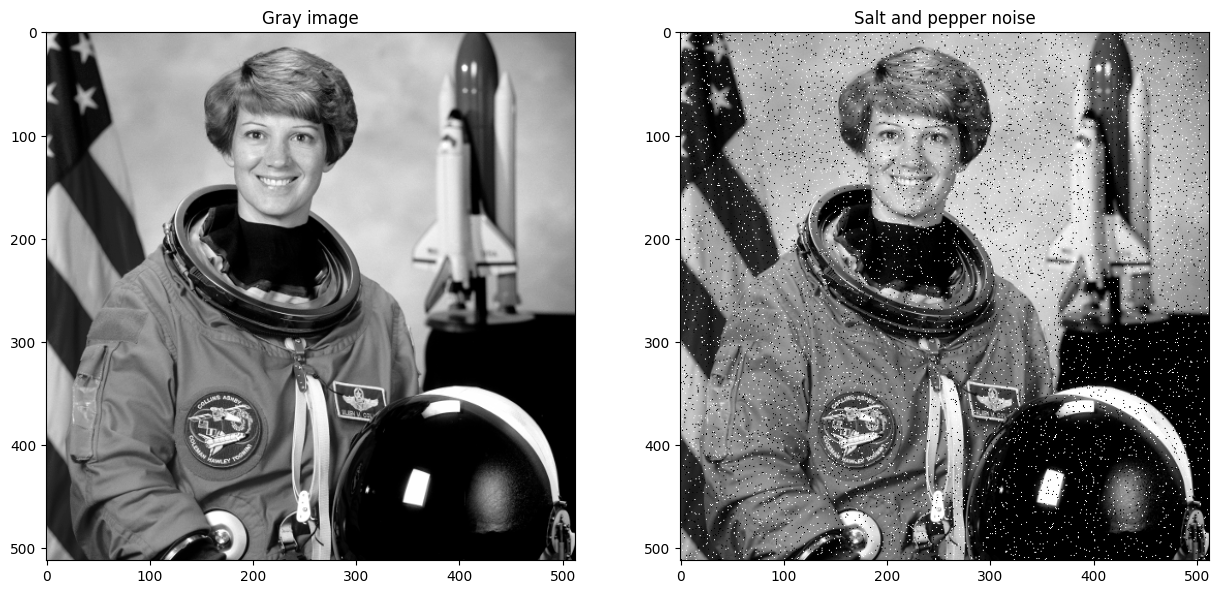

In [ ]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


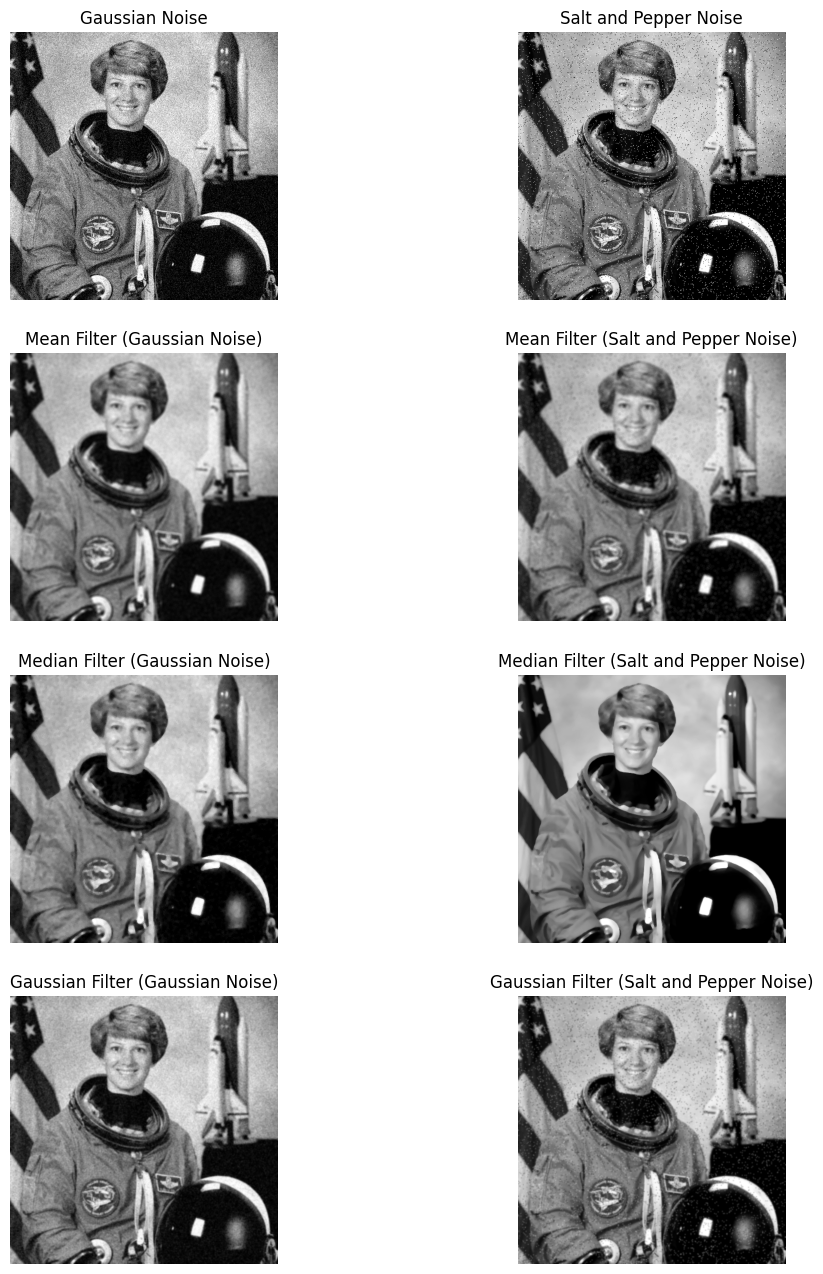

In [ ]:
# solution

# gaussian and salt&pepper noise
img_gaussian_noise    = random_noise(image, mode='gaussian', var=0.01)
img_salt_pepper_noise = random_noise(image, mode='s&p')

# mean filter
mean_filtered_gaussian    = filters.rank.mean(img_gaussian_noise, morphology.disk(3))
mean_filtered_salt_pepper = filters.rank.mean(img_salt_pepper_noise, morphology.disk(3))

# median filter
median_filtered_gaussian    = filters.median(img_gaussian_noise, morphology.disk(3))
median_filtered_salt_pepper = filters.median(img_salt_pepper_noise, morphology.disk(3))

# gaussian filter
gaussian_filtered_gaussian    = filters.gaussian(img_gaussian_noise, sigma=1)
gaussian_filtered_salt_pepper = filters.gaussian(img_salt_pepper_noise, sigma=1)


# visualisation
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# gaussian noise added
ax[0, 0].imshow(img_gaussian_noise, cmap='gray')
ax[0, 0].set_title('Gaussian Noise')
ax[0, 0].axis('off')
ax[0, 1].imshow(img_salt_pepper_noise, cmap='gray')
ax[0, 1].set_title('Salt and Pepper Noise')
ax[0, 1].axis('off')


# results of mean filter
ax[1, 0].imshow(mean_filtered_gaussian, cmap='gray')
ax[1, 0].set_title('Mean Filter (Gaussian Noise)')
ax[1, 0].axis('off')
ax[1, 1].imshow(mean_filtered_salt_pepper, cmap='gray')
ax[1, 1].set_title('Mean Filter (Salt and Pepper Noise)')
ax[1, 1].axis('off')

# results of median filter
ax[2, 0].imshow(median_filtered_gaussian, cmap='gray')
ax[2, 0].set_title('Median Filter (Gaussian Noise)')
ax[2, 0].axis('off')
ax[2, 1].imshow(median_filtered_salt_pepper, cmap='gray')
ax[2, 1].set_title('Median Filter (Salt and Pepper Noise)')
ax[2, 1].axis('off')

# results of gaussian filter
ax[3, 0].imshow(gaussian_filtered_gaussian, cmap='gray')
ax[3, 0].set_title('Gaussian Filter (Gaussian Noise)')
ax[3, 0].axis('off')
ax[3, 1].imshow(gaussian_filtered_salt_pepper, cmap='gray')
ax[3, 1].set_title('Gaussian Filter (Salt and Pepper Noise)')
ax[3, 1].axis('off')

plt.show()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

- Gaussian noise: The Gaussian filter works best because it is designed to handle the smooth, evenly distributed variations caused by this type of noise, reducing the overall distortion without severely affecting the image structure.

- Salt&pepper noise: The median filter works best, because this type of noise involves extreme pixel values (black and white specks), and the median filter replaces each pixel value with the median of its neighborhood, removing these outliers while preserving edges and details.

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

### Exercise:
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Visualize each of the steps using matplotlib

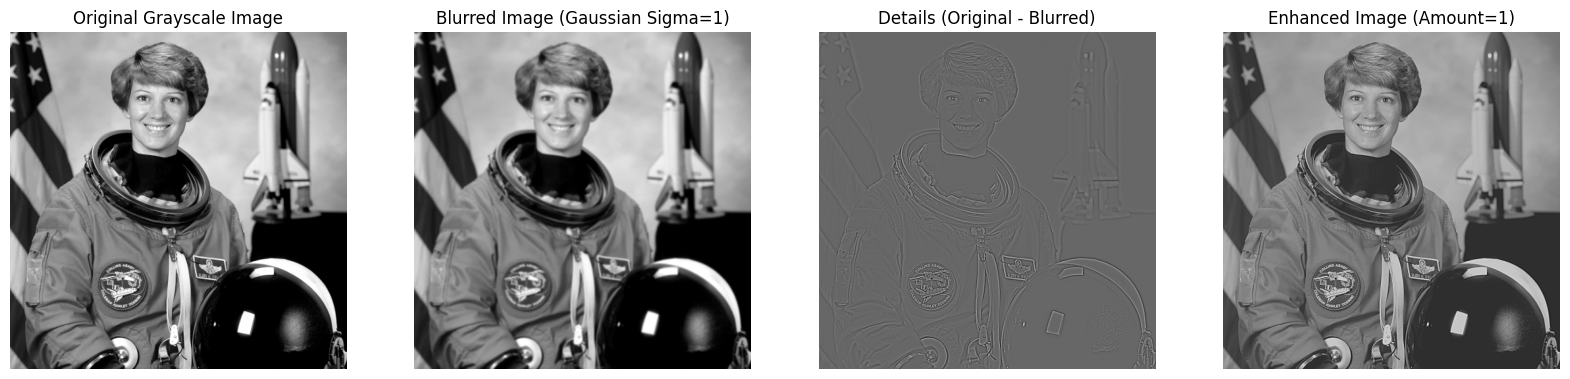

In [ ]:
# solution

astronaut_image = data.astronaut()
astronaut_image = color.rgb2gray(astronaut_image)

astronaut_smoothed_gaussian = filters.gaussian(astronaut_image, sigma=1)

astronaut_details = astronaut_image - astronaut_smoothed_gaussian

amount=1
astronaut_enhanced = astronaut_image + amount * astronaut_details


# visualisation
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# og
ax[0].imshow(astronaut_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

# blurred (gaussian)
ax[1].imshow(astronaut_smoothed_gaussian, cmap='gray')
ax[1].set_title('Blurred Image (Gaussian Sigma=1)')
ax[1].axis('off')

# details
ax[2].imshow(astronaut_details, cmap='gray')
ax[2].set_title('Details (Original - Blurred)')
ax[2].axis('off')

# enhanced
ax[3].imshow(astronaut_enhanced, cmap='gray')
ax[3].set_title(f'Enhanced Image (Amount={amount})')
ax[3].axis('off')

plt.show()


*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize the sharpened images using matplotlib

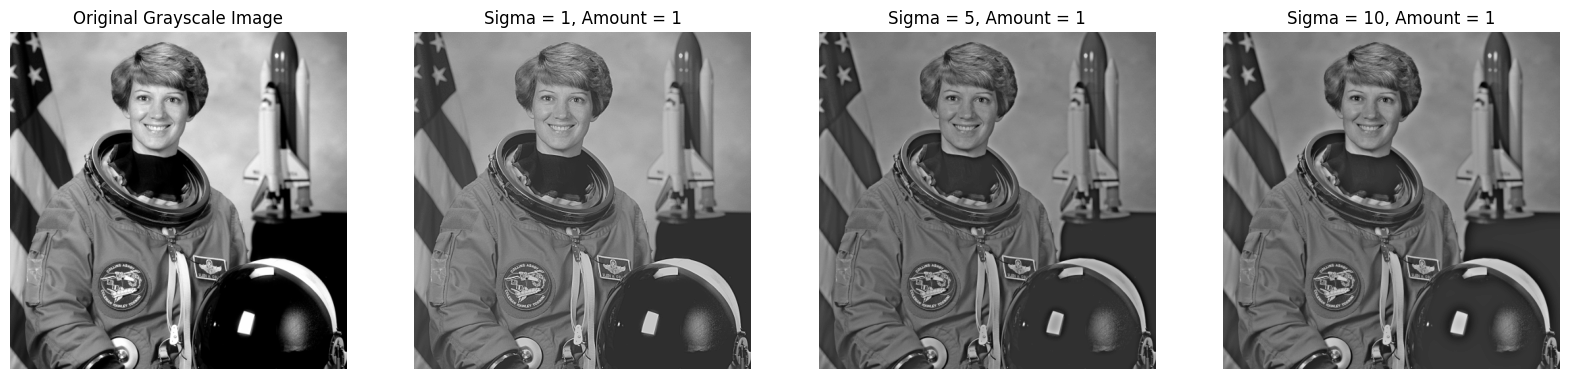

In [ ]:
# solution

# clean code! often repeated seq. of code
def sharpen_image(image, sigma, amount):
    blurred = filters.gaussian(image, sigma=sigma)
    details = image - blurred
    enhanced = image + amount * details
    return enhanced


# part 1. keeping amount=1 and finding best sigma

sigmas = [1, 5, 10]
amount = 1

fig, ax = plt.subplots(1, len(sigmas) + 1, figsize=(20, 5))

# og image
ax[0].imshow(astronaut_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

# visualise each sigma value
for i, sigma in enumerate(sigmas):
    enhanced_image = sharpen_image(astronaut_image, sigma=sigma, amount=amount)
    ax[i + 1].imshow(enhanced_image, cmap='gray')
    ax[i + 1].set_title(f'Sigma = {sigma}, Amount = {amount}')
    ax[i + 1].axis('off')

plt.show()

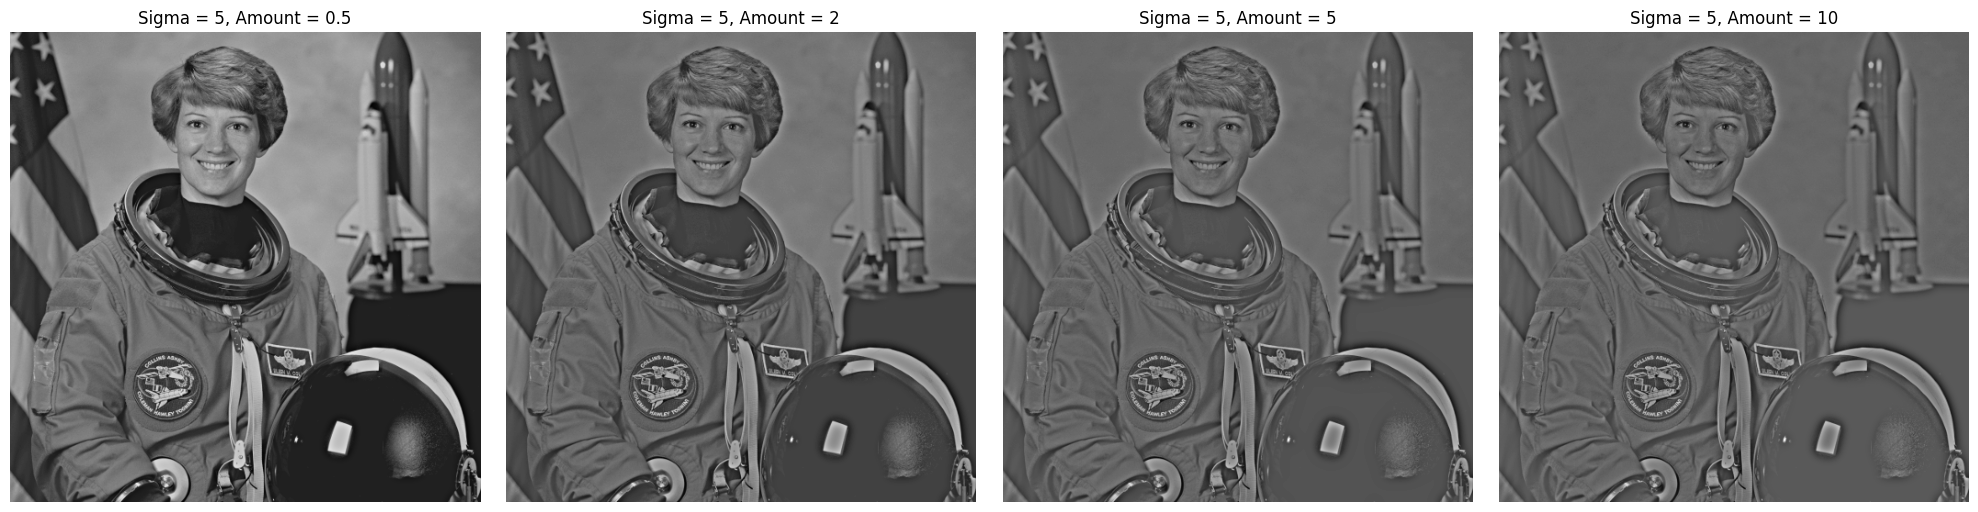

In [ ]:
# part 2. using best sigma (=5, in our opinion)

best_sigma = 5
amounts = [0.5, 2, 5, 10]

fig, ax = plt.subplots(1, len(amounts), figsize=(20, 5))

#visualize each amount value
for i, amount in enumerate(amounts):
    enhanced_image = sharpen_image(astronaut_image, sigma=best_sigma, amount=amount)
    ax[i].imshow(enhanced_image, cmap='gray')
    ax[i].set_title(f'Sigma = {best_sigma}, Amount = {amount}')
    ax[i].axis('off')

plt.show()

# Edge Detection

### Exercise:
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

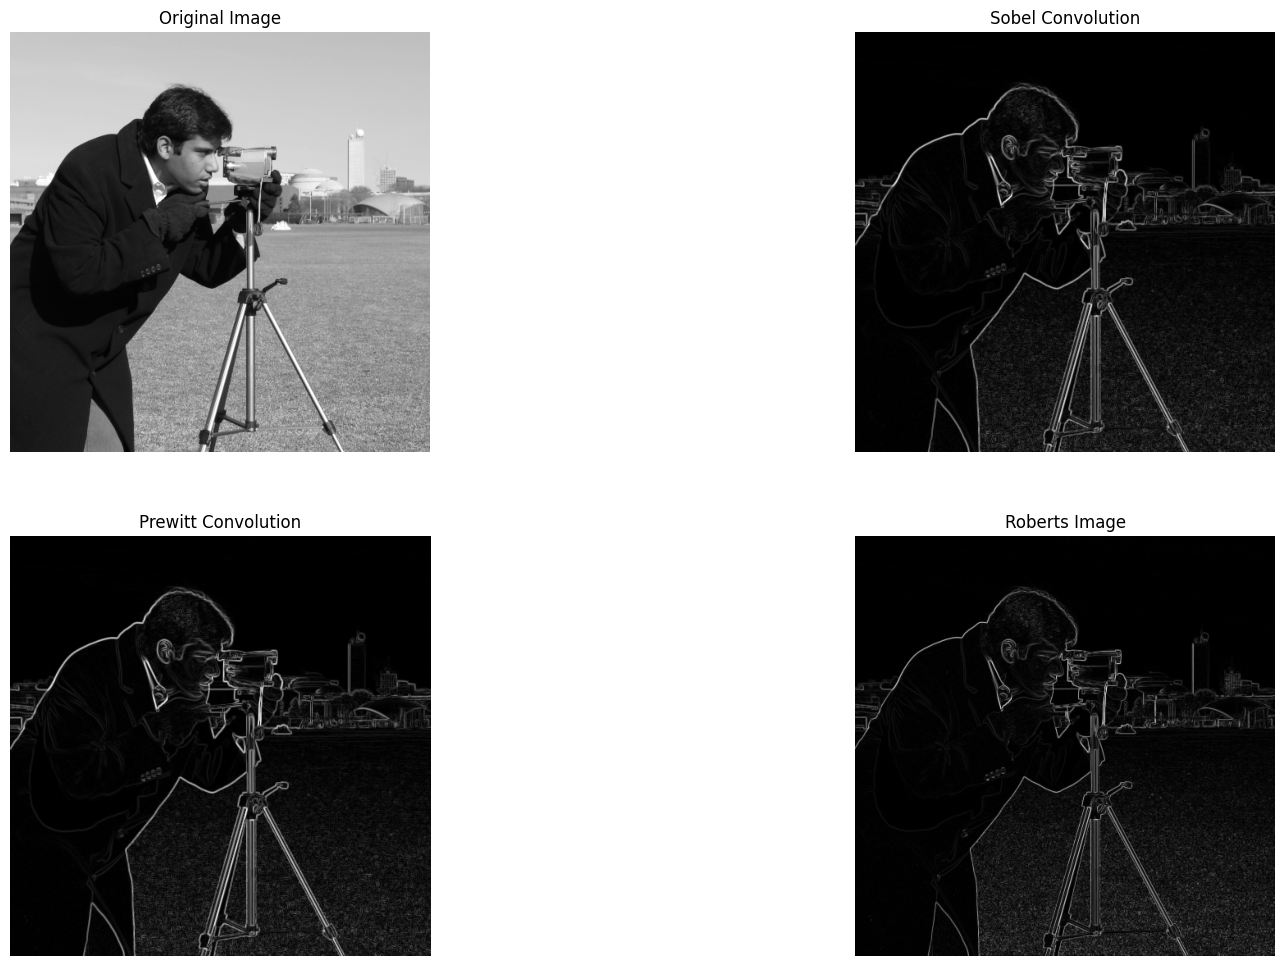

In [3]:
from skimage.filters import sobel, prewitt, roberts

# solution
camera_image = data.camera()
sobel_convolution_image = sobel(camera_image)
prewitt_convolution_image = prewitt(camera_image)
roberts_convolution_image = roberts(camera_image)

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20, 12))

ax[0][0].imshow(camera_image, cmap="gray")
ax[0][0].set_title("Original Image")
ax[0][0].axis("off")

ax[0][1].imshow(sobel_convolution_image, cmap="gray")
ax[0][1].set_title("Sobel Convolution")
ax[0][1].axis("off")

ax[1][0].imshow(prewitt_convolution_image, cmap="gray")
ax[1][0].set_title("Prewitt Convolution")
ax[1][0].axis("off")

ax[1][1].imshow(roberts_convolution_image, cmap="gray")
ax[1][1].set_title("Roberts Image")
ax[1][1].axis("off")

plt.show()


*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

Sobel and Prewitt are 3x3 filters while Roberts is 2x2 filter. Moreover, Sobel and Prewitt are used to dectect vertical/horizontal edges, while Roberts is done to detect diagonals. The main difference between Sobel and Prewitt is that Sobel gives more weight to the nearest pixels, while Prewitt distribute the weight evenly.

Althought Sobel is more resistent to noise, it can produce thicker edges and it is not able to handle diagonal edges as Roberts. Prewitt can struggle with detecting fine edge details. Finally, Roberts is more sensitive to noise as is using a lower kernel size (2x2) and it can't detecte horizontal and vertical edges as effectively as diagonal edges.

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.

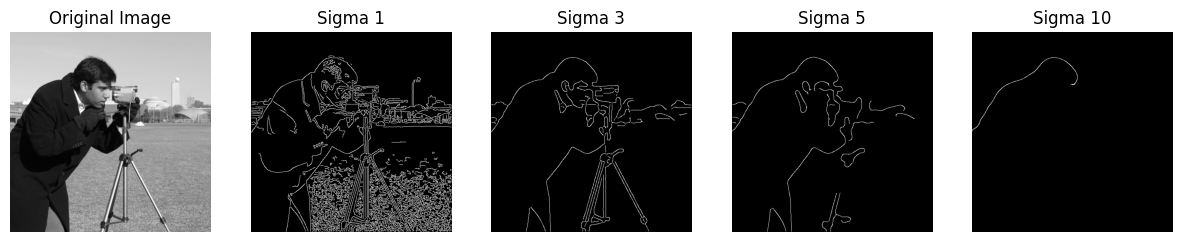

In [ ]:
# solution
from skimage.feature import canny

camera_image = data.camera()
canny_sigma_1 = canny(camera_image, sigma=1)
canny_sigma_3 = canny(camera_image, sigma=3)
canny_sigma_5 = canny(camera_image, sigma=5)
canny_sigma_10 = canny(camera_image, sigma=10)

fig, ax = plt.subplots(ncols=5, nrows=1, figsize= (15, 8))

ax[0].imshow(camera_image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(canny_sigma_1, cmap="gray")
ax[1].set_title("Sigma 1")
ax[1].axis("off")

ax[2].imshow(canny_sigma_3, cmap="gray")
ax[2].set_title("Sigma 3")
ax[2].axis("off")

ax[3].imshow(canny_sigma_5, cmap="gray")
ax[3].set_title("Sigma 5")
ax[3].axis("off")

ax[4].imshow(canny_sigma_10, cmap="gray")
ax[4].set_title("Sigma 10")
ax[4].axis("off")

plt.show()

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?

**Solution**

As we increase the sigma value it detects less edges. This is due to we are applying a Gaussian filter where sigma is the standard deviation then as we increase sigma we are smothing the image more and more, that's why every increment lets less edges to be detected.

The lower threshold defines the minimum intensity gradient required to classify a pixel as a potential edge, this is applied to find the locations with the sharpest change of intensity value. However, the higher threshold defines the intensity that should have a pixel to be classified as an edge.

*   What is the algorithm behind the Canny operator?


**Solution**

First of all, a Gaussian filter is applied to smooth the image, which helps reduce noise. Secondly, the intensity gradients of the image are calculated to identify sharp changes in intensity. Then, gradient magnitude thresholding or lower bound suppression is used to eliminate false edge responses. After that, a double threshold is applied to determine which edges have the potential to be real. Finally, edge tracking by hysteresis is performed, where weak edges that are not connected to strong edges are suppressed, leaving only the most significant edges.


---

## **End of P3: Filters and Edges**

This notebook is part of **Deliverable 1**

Deadline for Deliverable 1 (P2 and P3) submission in CampusVirtual is: **Monday, the 14th of October, 2024**
